In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
sample = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
train.shape,test.shape

((20000, 22), (5000, 21))

In [6]:
train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [7]:
train.nunique()

Location                 12399
Cross_Street              1495
Latitude                  3622
Longitude                 3578
Date_Reported              811
Date_Occurred              366
Time_Occurred              996
Area_ID                     21
Area_Name                   21
Reporting_District_no     1120
Part 1-2                     2
Modus_Operandi           10489
Victim_Age                 100
Victim_Sex                   4
Victim_Descent              17
Premise_Code               217
Premise_Description        216
Weapon_Used_Code            57
Weapon_Description          57
Status                       5
Status_Description           5
Crime_Category               6
dtype: int64

In [8]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,20000.0,33.940704,2.126810,0.0000,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,-117.893072,7.377726,-118.6634,-118.4297,-118.3230,-118.274400,0.0000
Time_Occurred,20000.0,1352.380350,646.100291,1.0000,930.0000,1430.0000,1900.000000,2359.0000
Area_ID,20000.0,10.834250,6.033166,1.0000,6.0000,11.0000,16.000000,21.0000
Reporting_District_no,20000.0,1129.599200,603.330519,101.0000,632.0000,1162.0000,1622.000000,2197.0000
Part 1-2,20000.0,1.418150,0.493267,1.0000,1.0000,1.0000,2.000000,2.0000
Victim_Age,20000.0,30.135000,21.863645,-2.0000,12.0000,31.0000,46.000000,99.0000
Premise_Code,20000.0,297.176950,212.007298,101.0000,101.0000,203.0000,501.000000,969.0000
Weapon_Used_Code,7335.0,366.405044,120.485687,101.0000,312.0000,400.0000,400.000000,515.0000


In [11]:
train.describe(include=['dtype','category']).T

,count,unique,top,freq
Location,20000,12399,6TH,33
Cross_Street,3448,1495,BROADWAY,56
Date_Reported,20000,811,07/13/2020 12:00:00 AM,87
Date_Occurred,20000,366,01/01/2020 12:00:00 AM,137
Area_Name,20000,21,77th Street,1345
Modus_Operandi,17259,10489,0344,826
Victim_Sex,17376,4,M,8538
Victim_Descent,17376,17,H,6143
Premise_Description,19995,216,STREET,5033
Weapon_Description,7335,57,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3990


In [12]:
numerical_columns = ['Latitude','Longitude','Time_Occurred','Area_ID','Reporting_District_no','Part 1-2','Victim_Age','Premise_Code','Weapon_Used_Code']
categorical_columns = ['Location','Cross_Street','Date_Reported','Date_Occurred','Area_Name','Modus_Operandi','Victim_Sex','Victim_Descent','Premise_Description','Weapon_Description','Status','Status_Description','Crime_Category']

## Exploratory Data Analysis

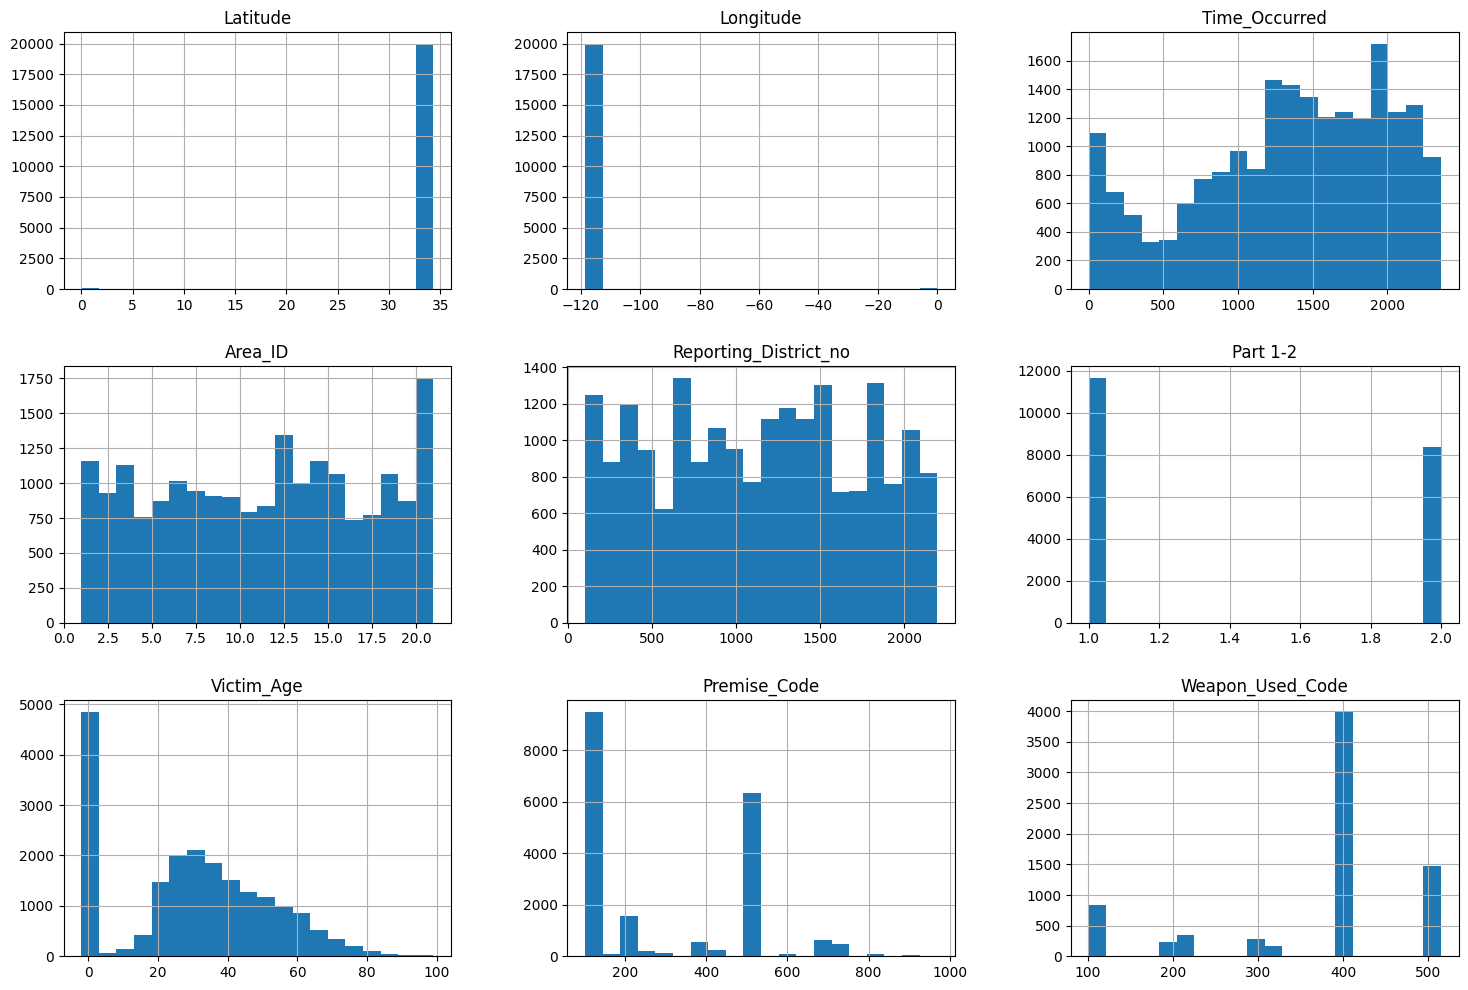

In [13]:
train.hist(bins=20,figsize=(18,12))
plt.show()

In [14]:
def plot_top_categories(df, column, top_n=10):
    top_categories = df[column].value_counts().nlargest(top_n).index

    df[column + '_grouped'] = df[column].apply(lambda x: x if x in top_categories else 'Miscellaneous')
    category_order = top_categories.tolist()
    if 'Miscellaneous' not in category_order:
        category_order.append('Miscellaneous')
    ax=sns.countplot(x=column + '_grouped', data=df, order=category_order)
    plt.title(f'Top {top_n} Categories in {column}')
    plt.xticks(rotation=90)
    for p in ax.patches:
        height = p.get_height()
        height = int(height)
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

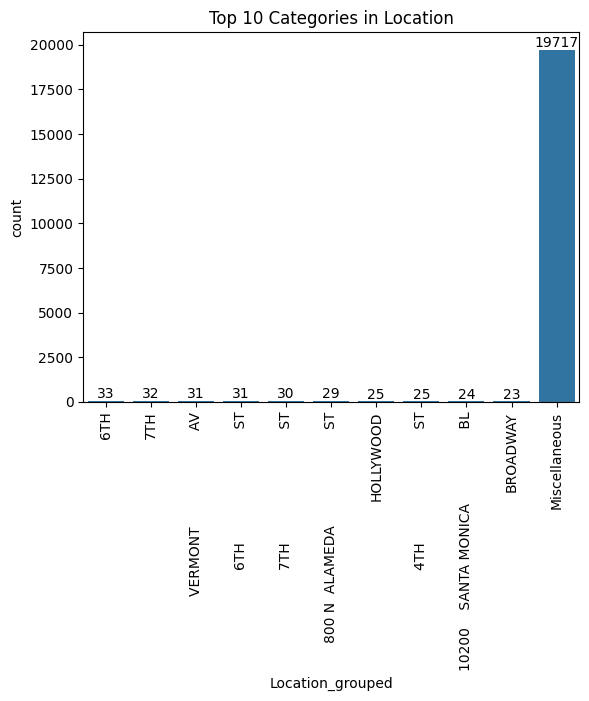

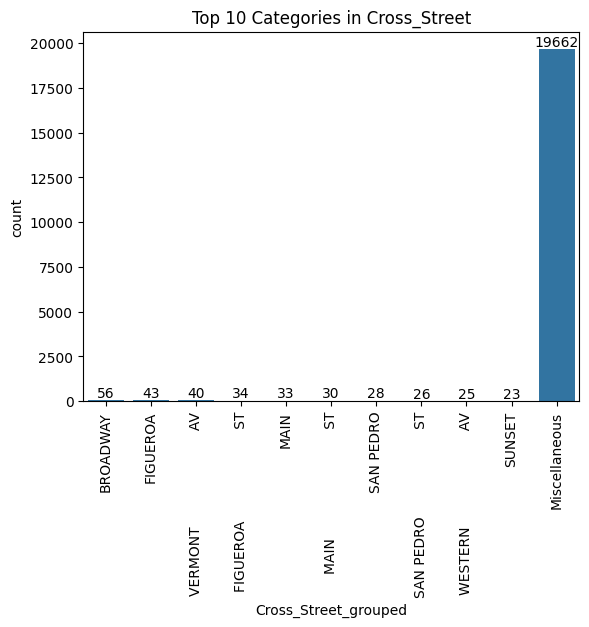

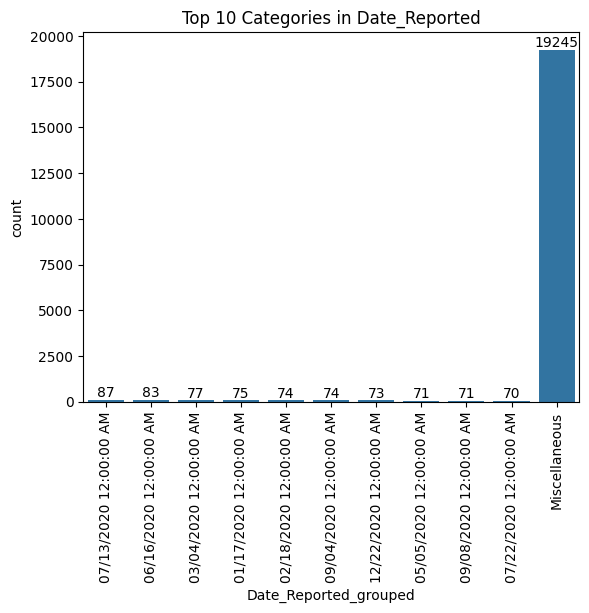

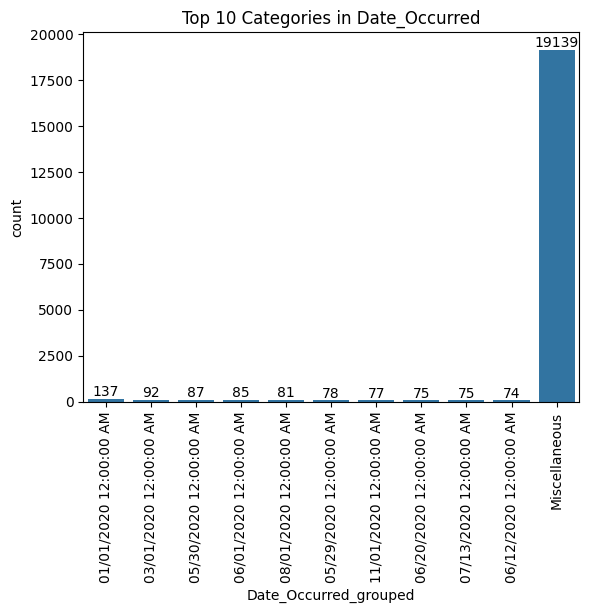

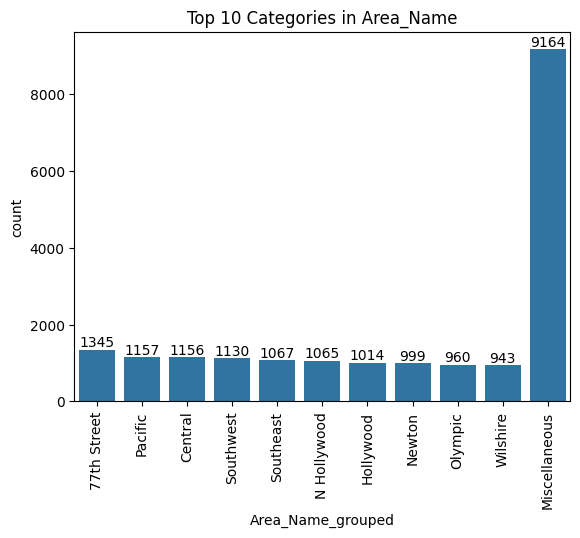

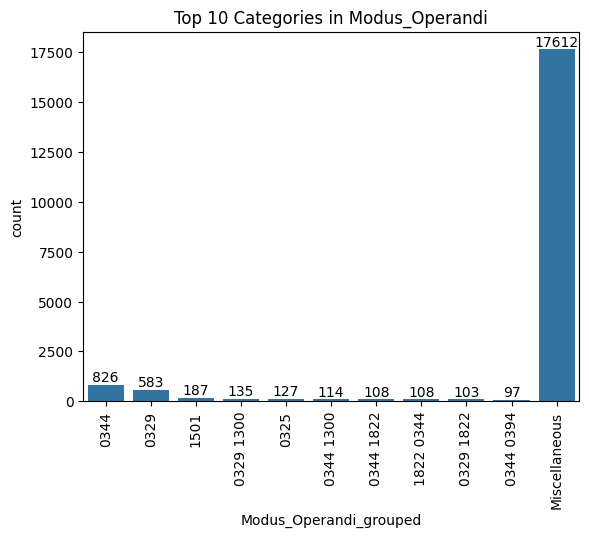

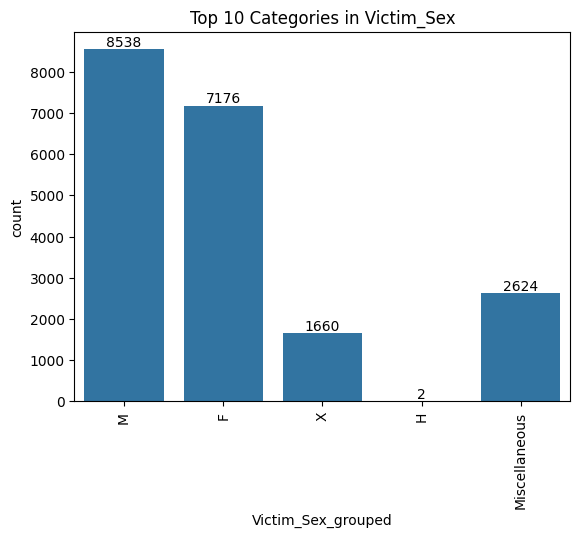

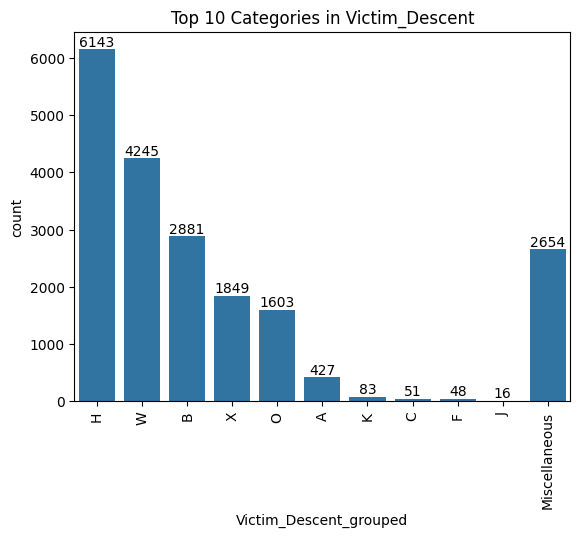

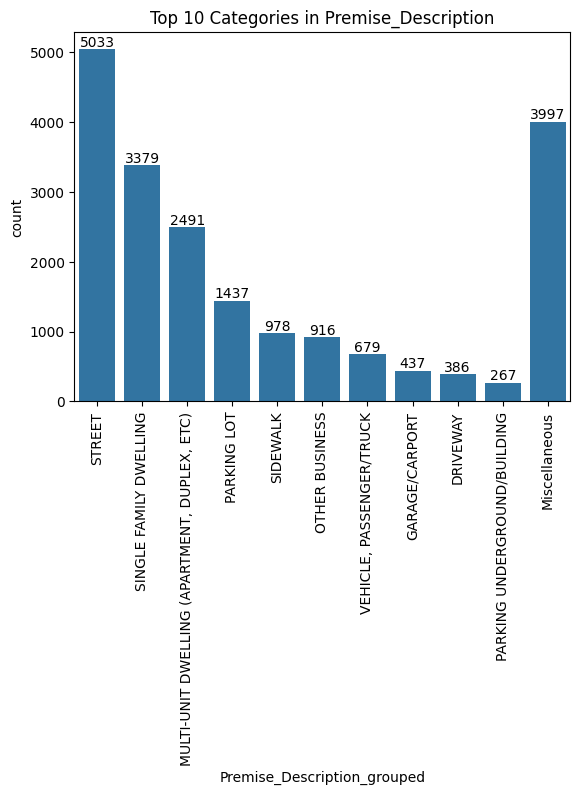

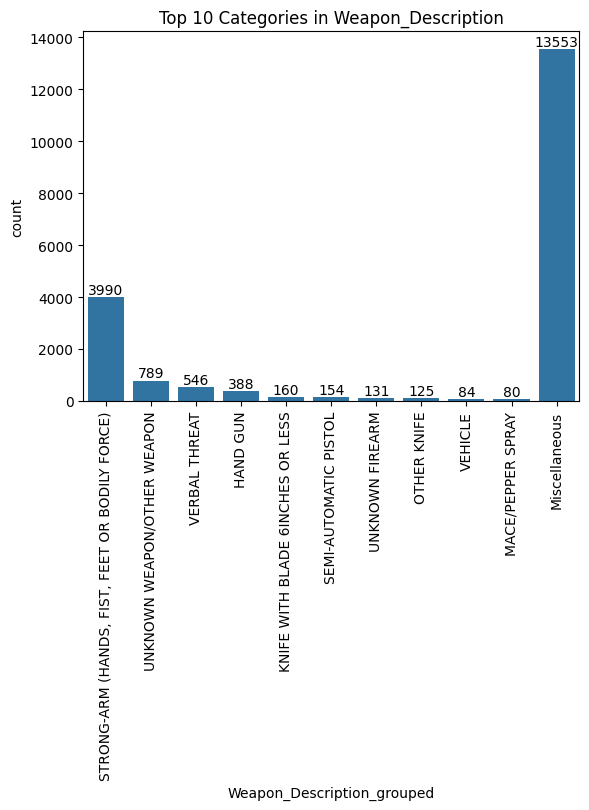

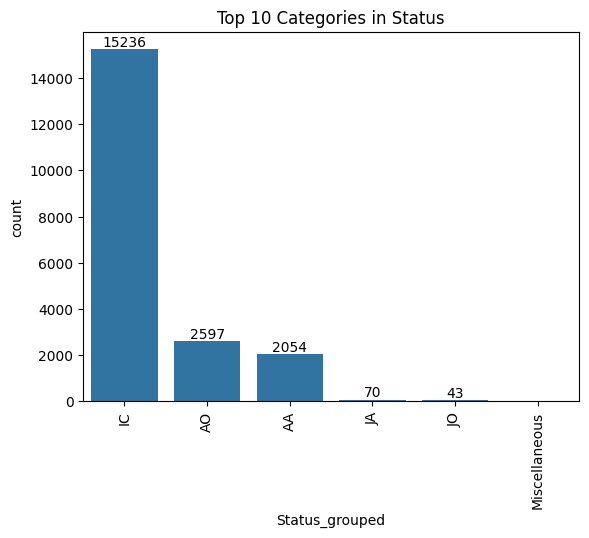

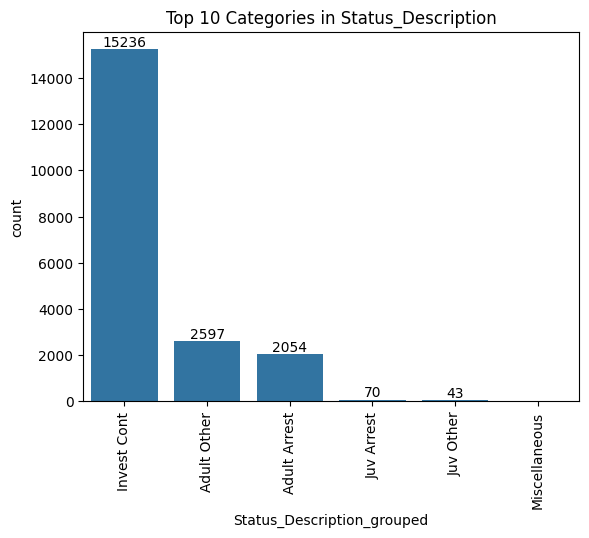

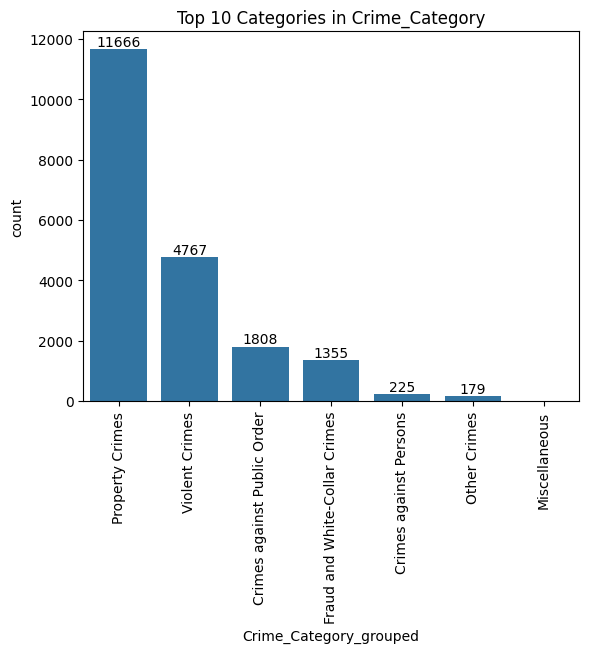

In [15]:
train_copy = train.copy()
for column in categorical_columns:
    plot_top_categories(train_copy, column, top_n=10)

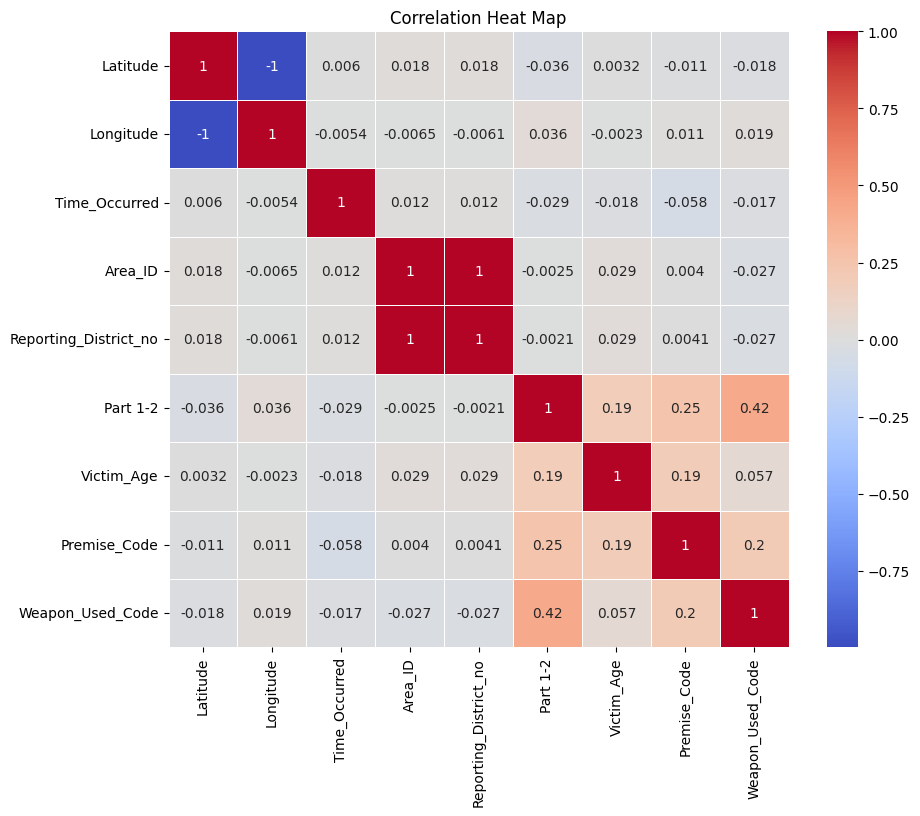

In [16]:
correlation_matrix = train[numerical_columns].corr()

# Create a heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

In [17]:
y = train['Crime_Category']
train.drop('Crime_Category', axis=1, inplace=True)

In [18]:
cols_to_drop = ['Location', 'Cross_Street', 'Date_Reported', 'Area_Name', 'Weapon_Description', 'Status_Description','Premise_Description']
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
train.head()

,Latitude,Longitude,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status
0,34.1522,-118.3910,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,NaN,IC
1,34.0028,-118.2391,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC
2,34.0111,-118.2653,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,NaN,IC
3,34.2953,-118.4590,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,NaN,IC
4,33.9787,-118.2918,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC


In [20]:
test.isna().sum()

Latitude                    0
Longitude                   0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Weapon_Used_Code         3153
Status                      0
dtype: int64

In [21]:
train['Victim_Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [22]:
train.fillna({'Modus_Operandi':train['Modus_Operandi'].mode()[0]},inplace=True)
test.fillna({'Modus_Operandi':test['Modus_Operandi'].mode()[0]},inplace=True)
train.fillna({'Victim_Sex':train['Victim_Sex'].mode()[0]},inplace=True)
test.fillna({'Victim_Sex':test['Victim_Sex'].mode()[0]},inplace=True)
train.fillna({'Victim_Descent':train['Victim_Descent'].mode()[0]},inplace=True)
test.fillna({'Victim_Descent':test['Victim_Descent'].mode()[0]},inplace=True)
train.fillna({'Weapon_Used_Code': 0},inplace=True)
test.fillna({'Weapon_Used_Code': 0},inplace=True)

In [23]:
train.head()

,Latitude,Longitude,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status
0,34.1522,-118.3910,03/06/2020 12:00:00 AM,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,0.0,IC
1,34.0028,-118.2391,02/27/2020 12:00:00 AM,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC
2,34.0111,-118.2653,08/21/2020 12:00:00 AM,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,0.0,IC
3,34.2953,-118.4590,11/06/2020 12:00:00 AM,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,0.0,IC
4,33.9787,-118.2918,02/25/2020 12:00:00 AM,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC


In [24]:
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'])

In [25]:
train['Year'] = train['Date_Occurred'].dt.year
train['Month'] = train['Date_Occurred'].dt.month
train['Day'] = train['Date_Occurred'].dt.day
train['DayOfWeek'] = train['Date_Occurred'].dt.dayofweek

test['Year'] = test['Date_Occurred'].dt.year
test['Month'] = test['Date_Occurred'].dt.month
test['Day'] = test['Date_Occurred'].dt.day
test['DayOfWeek'] = test['Date_Occurred'].dt.dayofweek 

In [26]:
train.drop('Date_Occurred', axis=1, inplace=True)
test.drop('Date_Occurred', axis=1, inplace=True)

In [27]:
train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Year,Month,Day,DayOfWeek
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,0.0,IC,2020,3,6,4
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,2020,2,27,3
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,0.0,IC,2020,8,21,4
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,0.0,IC,2020,11,6,4
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,2020,2,25,1


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [29]:
train_txt1 = train['Modus_Operandi']
train = train.drop('Modus_Operandi',axis=1)
test_txt1 = test['Modus_Operandi']
test = test.drop('Modus_Operandi',axis=1)


In [30]:
train.shape,test.shape

((20000, 16), (5000, 16))

In [31]:
train_txt_vec = tfidf_vectorizer.fit_transform(train_txt1)
test_txt_vec = tfidf_vectorizer.transform(test_txt1)

In [32]:
train_txt_vec.data.shape,test_txt_vec.data.shape

((64726,), (16249,))

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               20000 non-null  float64
 1   Longitude              20000 non-null  float64
 2   Time_Occurred          20000 non-null  float64
 3   Area_ID                20000 non-null  float64
 4   Reporting_District_no  20000 non-null  float64
 5   Part 1-2               20000 non-null  float64
 6   Victim_Age             20000 non-null  float64
 7   Victim_Sex             20000 non-null  object 
 8   Victim_Descent         20000 non-null  object 
 9   Premise_Code           20000 non-null  float64
 10  Weapon_Used_Code       20000 non-null  float64
 11  Status                 20000 non-null  object 
 12  Year                   20000 non-null  int32  
 13  Month                  20000 non-null  int32  
 14  Day                    20000 non-null  int32  
 15  Da

In [34]:
train_text2 = train[['Victim_Sex', 'Victim_Descent','Status']]
train = train.drop(['Victim_Sex', 'Victim_Descent','Status'],axis=1)
test_text2 = test[['Victim_Sex', 'Victim_Descent','Status']]
test = test.drop(['Victim_Sex', 'Victim_Descent','Status'],axis=1)

In [35]:
train_text2['Victim_Descent'].unique()

array(['W', 'H', 'B', 'X', 'O', 'A', 'K', 'C', 'F', 'I', 'J', 'Z', 'V',
       'P', 'D', 'U', 'G'], dtype=object)

In [36]:
test_text2['Victim_Descent'].unique()

array(['H', 'B', 'W', 'Z', 'K', 'X', 'O', 'A', 'J', 'I', 'C', 'F', 'V',
       'G', 'P', 'S'], dtype=object)

In [37]:
train_text2_enconded = pd.get_dummies(train_text2, columns=['Victim_Sex', 'Victim_Descent','Status'], prefix=['Sex', 'Descent','Status'])
test_text2_enconded = pd.get_dummies(test_text2, columns=['Victim_Sex', 'Victim_Descent','Status'], prefix=['Sex', 'Descent','Status'])
train_text2_enconded = train_text2_enconded.astype(int)
test_text2_enconded = test_text2_enconded.astype(int)

In [38]:
train_text2_enconded.shape,test_text2_enconded.shape

((20000, 26), (5000, 25))

In [39]:
train_text2_enconded.head(3)

,Sex_F,Sex_H,Sex_M,Sex_X,Descent_A,Descent_B,Descent_C,Descent_D,Descent_F,Descent_G,...,Descent_U,Descent_V,Descent_W,Descent_X,Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
test_text2_enconded.head(3)

,Sex_F,Sex_H,Sex_M,Sex_X,Descent_A,Descent_B,Descent_C,Descent_F,Descent_G,Descent_H,...,Descent_S,Descent_V,Descent_W,Descent_X,Descent_Z,Status_AA,Status_AO,Status_IC,Status_JA,Status_JO
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
train_text2_enconded, test_text2_enconded = train_text2_enconded.align(test_text2_enconded, join='outer', axis=1, fill_value=0)

In [42]:
cat_cols =['Date_Occurred','Modus_Operandi','Victim_Sex','Victim_Descent','Status']
num_cols =['Latitude','Longitude','Time_Occurred','Area_ID','Reporting_District_no','Part 1-2','Victim_Age','Premise_Code','Weapon_Used_Code']

In [43]:
from sklearn.preprocessing import StandardScaler
sscalar = StandardScaler()

In [44]:
train_scaled = sscalar.fit_transform(train)
test_scaled = sscalar.fit_transform(test)

In [45]:
df_train_stacked = np.hstack([train_scaled,train_txt_vec.toarray(),train_text2_enconded])
df_test_stacked = np.hstack([test_scaled,test_txt_vec.toarray(),test_text2_enconded])

In [46]:
df_train_stacked

array([[ 0.09944512, -0.06749235,  0.69281944, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02919732, -0.04690284, -0.0114232 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03309998, -0.05045416, -1.15678486, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05472915, -0.06620466,  0.07370503, ...,  1.        ,
         0.        ,  0.        ],
       [-0.09197307, -0.0529211 , -1.16452379, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.0296205 , -0.05561848,  0.69281944, ...,  1.        ,
         0.        ,  0.        ]])

In [47]:
X = df_train_stacked

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((16000, 521), (4000, 521), (16000,), (4000,))

# # Model 1: Logistic regression

In [50]:
# Function to get performance of all the models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def get_model_performance(actual_values, predicted_values):
    print("============================= Classification Report =============================")
    report = classification_report(actual_values, predicted_values, digits=4)
    print(report)
    print("=============================== Confusion Matrix ===============================")
    cm = confusion_matrix(actual_values, predicted_values)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [51]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(max_iter = 5000)

In [52]:
lrm.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.6818    0.4688    0.5556        32
  Crimes against Public Order     0.8160    0.8182    0.8171       374
Fraud and White-Collar Crimes     0.9265    0.9438    0.9351       267
                 Other Crimes     0.5833    0.2000    0.2979        35
              Property Crimes     0.9791    0.9744    0.9767      2303
               Violent Crimes     0.9046    0.9393    0.9216       989

                     accuracy                         0.9383      4000
                    macro avg     0.8152    0.7241    0.7507      4000
                 weighted avg     0.9360    0.9383    0.9361      4000

=============================== Confusion Matrix ===============================


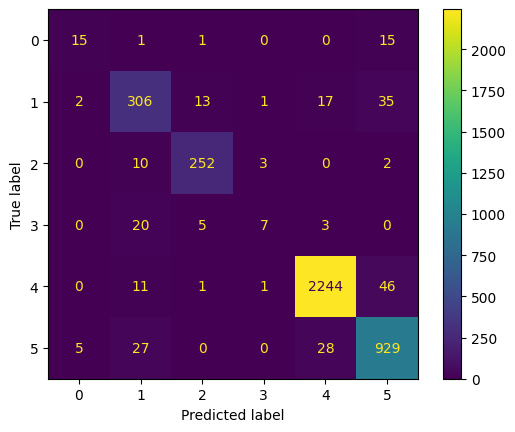

In [53]:
val_predicted_lrm = lrm.predict(X_val)
get_model_performance(y_val,val_predicted_lrm )

In [54]:
# lrm.fit(df_train_stacked,y)
# y_lrm_pred = lrm.predict(df_test_stacked)

In [55]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_lrm_pred})

# # Model 2: Random Forest Classifier 

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.5455    0.1875    0.2791        32
  Crimes against Public Order     0.8830    0.8075    0.8436       374
Fraud and White-Collar Crimes     0.9288    0.9288    0.9288       267
                 Other Crimes     1.0000    0.0571    0.1081        35
              Property Crimes     0.9801    0.9822    0.9811      2303
               Violent Crimes     0.9019    0.9757    0.9373       989

                     accuracy                         0.9463      4000
                    macro avg     0.8732    0.6565    0.6797      4000
                 weighted avg     0.9449    0.9463    0.9407      4000

=============================== Confusion Matrix ===============================


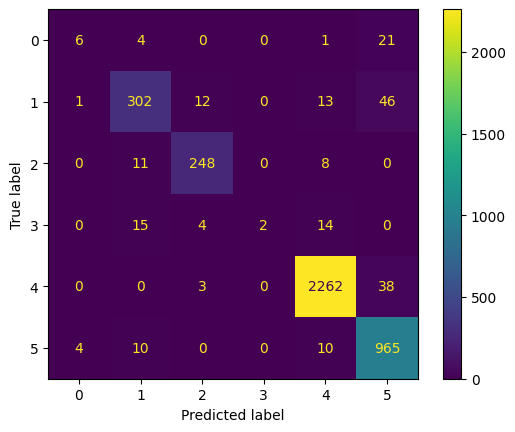

In [58]:
val_predicted_rfc = rfc.predict(X_val)
get_model_performance(y_val,val_predicted_rfc )

In [59]:
# rfc.fit(df_train_stacked, y)
# y_rf_pred = rfc.predict(df_test_stacked)

In [60]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_rf_pred})

# # Model 3: Support Vector Machine (SVM)

In [61]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)

In [62]:
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.5161    0.5000    0.5079        32
  Crimes against Public Order     0.7753    0.8396    0.8062       374
Fraud and White-Collar Crimes     0.9358    0.9288    0.9323       267
                 Other Crimes     0.6667    0.2857    0.4000        35
              Property Crimes     0.9873    0.9770    0.9821      2303
               Violent Crimes     0.9264    0.9414    0.9338       989

                     accuracy                         0.9423      4000
                    macro avg     0.8013    0.7454    0.7604      4000
                 weighted avg     0.9424    0.9423    0.9415      4000

=============================== Confusion Matrix ===============================


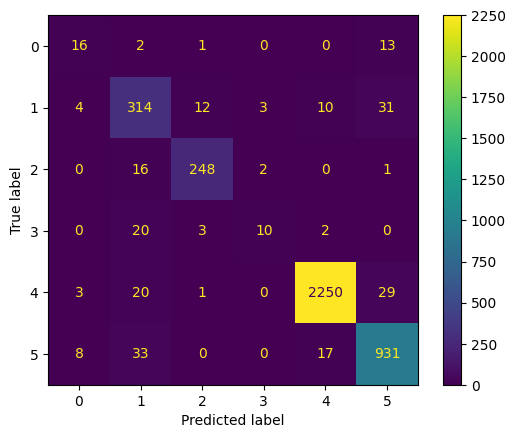

In [63]:
val_predicted_svm = svm.predict(X_val)
get_model_performance(y_val,val_predicted_svm )

In [64]:
# svm.fit(df_train_stacked, y)
# y_svm_pred = svm.predict(df_test_stacked)

In [65]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_svm_pred})

# Model 4: Gradient Boosting(XGBClassifier)

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
y_train_enc = le.fit_transform(y_train)

In [74]:
xgb.fit(X_train,y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.6970    0.7188    0.7077        32
  Crimes against Public Order     0.8571    0.8503    0.8537       374
Fraud and White-Collar Crimes     0.9506    0.9363    0.9434       267
                 Other Crimes     0.6250    0.2857    0.3922        35
              Property Crimes     0.9900    0.9878    0.9889      2303
               Violent Crimes     0.9352    0.9636    0.9492       989

                     accuracy                         0.9573      4000
                    macro avg     0.8425    0.7904    0.8058      4000
                 weighted avg     0.9559    0.9573    0.9559      4000

=============================== Confusion Matrix ===============================


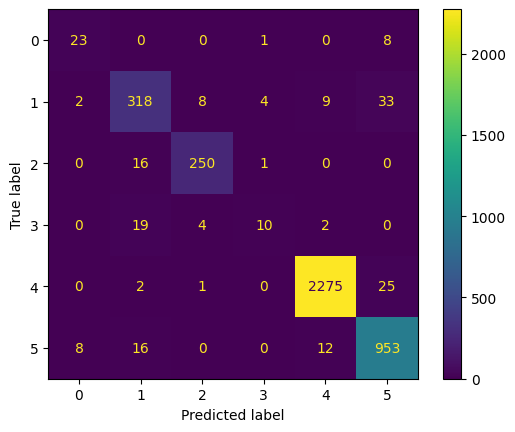

In [76]:
val_predicted_xgb = xgb.predict(X_val)
val_predicted_xgb_decoded = le.inverse_transform(val_predicted_xgb)
get_model_performance(y_val,val_predicted_xgb_decoded)

In [77]:
# y_encoded = le.fit_transform(y)
# xgb.fit(df_train_stacked, y_encoded)
# y_xgb_pred = xgb.predict(df_test_stacked)
# y_xgb_pred_decoded = le.inverse_transform(y_xgb_pred)

In [78]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_xgb_pred_decoded})

# # Model 5: Multi Layer Perceptron Classifier

In [79]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

In [80]:
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=300, random_state=42)

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.4545    0.4688    0.4615        32
  Crimes against Public Order     0.8005    0.8155    0.8079       374
Fraud and White-Collar Crimes     0.9234    0.9026    0.9129       267
                 Other Crimes     0.4286    0.3429    0.3810        35
              Property Crimes     0.9792    0.9805    0.9798      2303
               Violent Crimes     0.9233    0.9252    0.9242       989

                     accuracy                         0.9365      4000
                    macro avg     0.7516    0.7392    0.7446      4000
                 weighted avg     0.9359    0.9365    0.9362      4000

=============================== Confusion Matrix ===============================


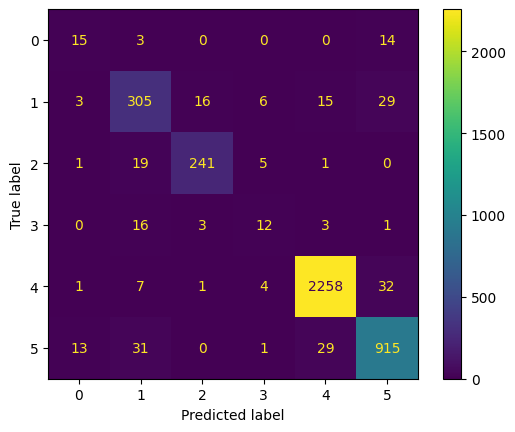

In [81]:
val_predicted_mlp = mlp.predict(X_val)
get_model_performance(y_val,val_predicted_mlp)

In [82]:
# mlp.fit(df_train_stacked, y)
# y_mlp_pred = mlp.predict(df_test_stacked)

In [83]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_mlp_pred})

# # Model 6: k-Nearest Neighbors (k-NN)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [85]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.4000    0.0625    0.1081        32
  Crimes against Public Order     0.6029    0.3369    0.4322       374
Fraud and White-Collar Crimes     0.6797    0.7790    0.7260       267
                 Other Crimes     0.2000    0.0286    0.0500        35
              Property Crimes     0.8720    0.9318    0.9009      2303
               Violent Crimes     0.7860    0.8059    0.7958       989

                     accuracy                         0.8200      4000
                    macro avg     0.5901    0.4908    0.5022      4000
                 weighted avg     0.8031    0.8200    0.8056      4000

=============================== Confusion Matrix ===============================


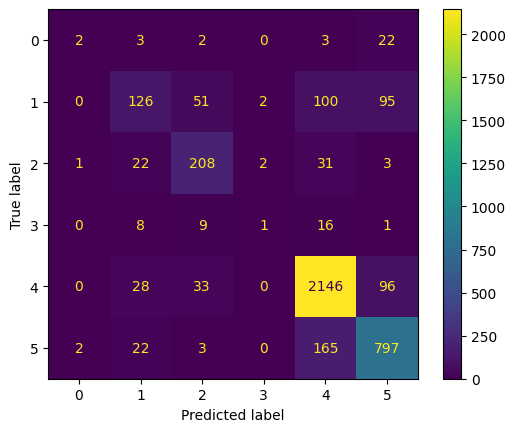

In [86]:
val_predicted_knn = knn.predict(X_val)
get_model_performance(y_val,val_predicted_knn)

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [88]:
param_distributions = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'p': randint(1, 5) 
}

In [89]:
random_search_cv = RandomizedSearchCV(estimator=knn, param_distributions=param_distributions,
                                   n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

In [90]:
random_search_cv.fit(X_train, y_train_enc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd8889f7370>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fd888df1420>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=1)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

============================= Classification Report =============================
                               precision    recall  f1-score   support

       Crimes against Persons     0.4286    0.0938    0.1538        32
  Crimes against Public Order     0.7333    0.4412    0.5509       374
Fraud and White-Collar Crimes     0.7631    0.8202    0.7906       267
                 Other Crimes     0.5000    0.0286    0.0541        35
              Property Crimes     0.8866    0.9605    0.9221      2303
               Violent Crimes     0.8455    0.8413    0.8434       989

                     accuracy                         0.8580      4000
                    macro avg     0.6928    0.5309    0.5525      4000
                 weighted avg     0.8468    0.8580    0.8454      4000

=============================== Confusion Matrix ===============================


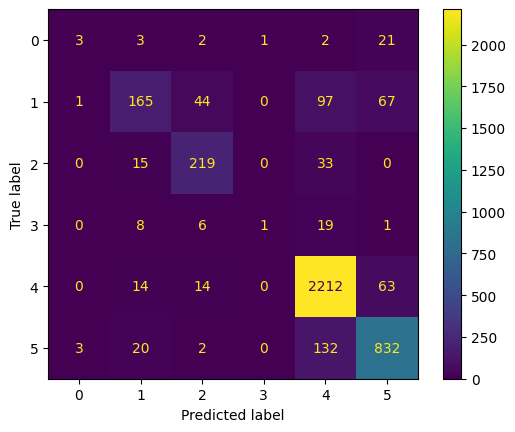

In [97]:
best_knn_model = random_search_cv.best_estimator_
val_predicted_knn_rscv = best_knn_model.predict(X_val)
val_predicted_knn_decoded = le.inverse_transform(val_predicted_knn_rscv)
print(f'Best Parameters: {random_search_cv.best_params_}')
print("")
get_model_performance(y_val, val_predicted_knn_decoded)

In [92]:
# knn.fit(df_train_stacked, y)
# y_knn_pred = knn.predict(df_test_stacked)

In [93]:
# submission=pd.DataFrame({"ID":range(1,5001),'Crime_Category':y_knn_pred})

In [94]:
# submission.head()

In [95]:
# submission.to_csv('submission.csv',index=False)